In [1]:
import os 
import sys
import glob
import time
from tqdm import tqdm

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

import MDAnalysis as mda
from MDAnalysis.analysis import distances
from MDAnalysis.analysis.rms import RMSD

In [4]:
runs = glob.glob("../../run_*")

traj_out = 'traj_out'
os.makedirs(traj_out, exist_ok=True)

rmsd_profs = {}
for run in runs[:]:
    label = os.path.basename(run)[4:]
    print(f"Running system {label}...")
    pdb_file = run + f"/{label}.pdb"
    traj_file = run + "/output.dcd"
    mda_traj = mda.Universe(pdb_file, traj_file)

    # prepare trajecory
    pdb_out = traj_out + f'/{label}_no_sol.pdb'
    dcd_out = traj_out + f'/{label}_no_sol.dcd'
#     no_sol = mda_traj.select_atoms('not resname SOL and not resname NA and not resname CL')
#     no_sol.write(pdb_out)
#     if label.startswith("comp"):
#         nsp10 = mda_traj.segments[1].atoms
#         nsp16 = mda_traj.segments[0].atoms
#         with mda.Writer(dcd_out, no_sol.n_atoms) as W:
#             for ts in tqdm(mda_traj.trajectory):
#                 box_edge = ts.dimensions[0]
#                 box_center = box_edge / 2
#                 trans_vec = box_center - np.array(nsp16.center_of_mass())
#                 no_sol.atoms.translate(trans_vec).wrap()
#                 trans_vec = box_center - np.array(no_sol.center_of_mass())
#                 no_sol.atoms.translate(trans_vec).wrap()
#                 W.write(no_sol)
#     else:
#         with mda.Writer(dcd_out, no_sol.n_atoms) as W:
#             for ts in tqdm(mda_traj.trajectory):
#                 W.write(no_sol)
    mda_traj = mda.Universe(pdb_out, dcd_out)

    # prep ref traj
    if label.startswith("comp"):
        ref_pdb = "../../run_comp/comp.pdb"
    else:
        ref_pdb = pdb_file
    ref_traj = mda.Universe(ref_pdb)

    rmsd_inst = RMSD(mda_traj, ref_traj,
            select='protein and name CA',
            verbose=1)
    rmsd_inst.run()
    rmsd_profs[label] = rmsd_inst.rmsd

Running system nsp10...


RMSD  5.39 A at frame 10000/10000  [100.0%]


Running system comp_sam...


RMSD  4.34 A at frame 10000/10000  [100.0%]


Running system comp...


RMSD  4.68 A at frame 10000/10000  [100.0%]


Running system nsp16...


RMSD  4.42 A at frame 10000/10000  [100.0%]


Running system comp_sep...


RMSD 12.08 A at frame 10000/10000  [100.0%]


In [5]:
mda.__version__

'0.19.2'

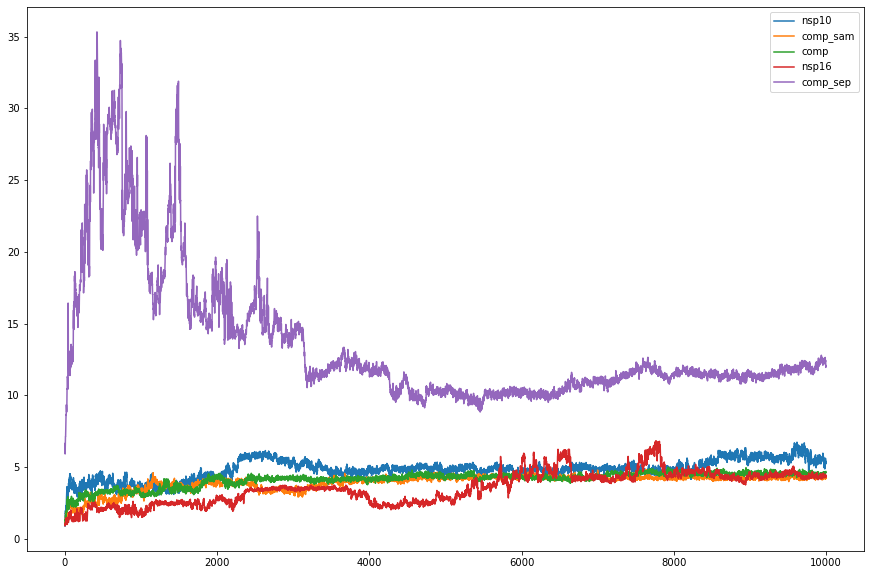

In [6]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for rmsd in rmsd_profs: 
    rmsd_prof = rmsd_profs[rmsd]
    ax.plot(rmsd_prof[:,2], label=rmsd) 
plt.legend()
        

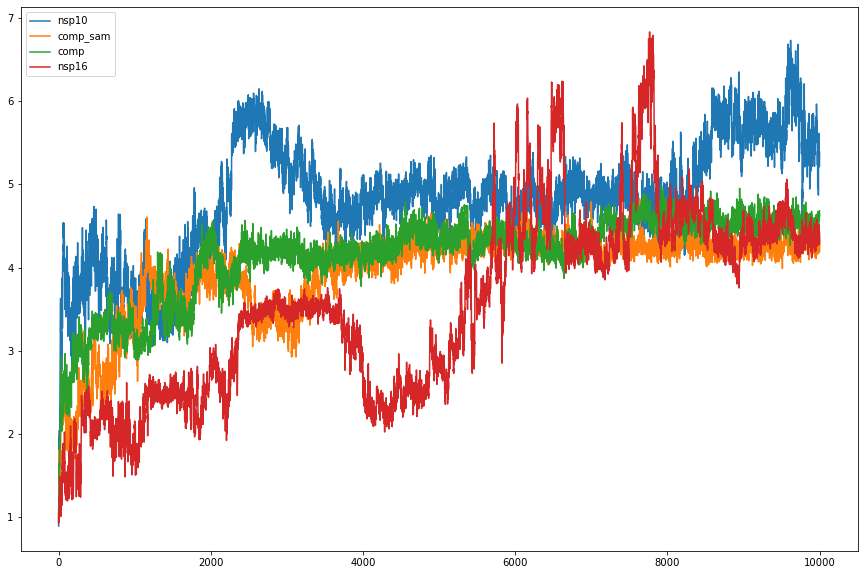

In [7]:
fig, ax = plt.subplots(figsize=(15,10)) 
n_traj = 0 

for rmsd in rmsd_profs: 
    if rmsd == 'comp_sep': 
        continue
    rmsd_prof = rmsd_profs[rmsd]
    ax.plot(rmsd_prof[:,2], label=rmsd) 
plt.legend()

In [ ]:
%run ~/.matplotlib.py